In [19]:
from pathlib2 import Path
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from kinectacq.video_io import read_frames

In [ ]:
#!ffmpeg -i /mnt/chronic/TimS/azure/22_3_3_chronic/2022-03-03_13-49-33/master/ir.avi -c:v libx264 -crf 18 -preset veryslow -c:a copy /mnt/chronic/TimS/azure/22_3_3_chronic/2022-03-03_13-49-33/master/ir.mp4

In [22]:
!ffmpeg -i /mnt/chronic/TimS/azure/22_3_3_chronic/2022-03-03_13-49-33/master/ir.avi -c:v libx264 -crf 0 -preset veryslow -c:a copy /mnt/chronic/TimS/azure/22_3_3_chronic/2022-03-03_13-49-33/master/ir-crf0.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [23]:
recording_duration_s = 10

In [24]:
filename_prefix = Path("/mnt/chronic/TimS/azure/22_3_3_chronic/2022-03-03_13-49-33")

In [29]:
file_loc = filename_prefix / 'master' /  "ir-crf0.mp4"
frames = read_frames(
    file_loc,
    [0,1,2],
    threads=6,
    fps=30,
    pixel_format="gray16",
    frame_size=(640, 576),
    slices=24,
    slicecrc=1,
    get_cmd=False,
)

In [30]:
file_loc

PosixPath('/mnt/chronic/TimS/azure/22_3_3_chronic/2022-03-03_13-49-33/master/ir-crf0.mp4')

In [31]:
vidcap = cv2.VideoCapture(file_loc.as_posix())
total_frames = vidcap.get(7)

In [32]:
nbit = 16
total_expected_bits = total_frames * np.product(frames[0].shape) * nbit
total_expected_MB_uncompressed = total_expected_bits * 1.192e-7 
GB_per_hour = os.path.getsize(file_loc) / (recording_duration_s / (60*60)) * 1e-9
print('uncompressed size: {} MB'.format(round(total_expected_MB_uncompressed)))
print('actual_size: {} MB'.format(round(os.path.getsize(file_loc) * 1e-6)))
print('size per hour: {} GB'.format(round(GB_per_hour, 1)))

uncompressed size: 209 MB
actual_size: 9 MB
size per hour: 3.4 GB


(array([7.4323e+04, 6.7400e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  514. ,  7016.1, 13518.2, 20020.3, 26522.4, 33024.5, 39526.6,
        46028.7, 52530.8, 59032.9, 65535. ]),
 <BarContainer object of 10 artists>)

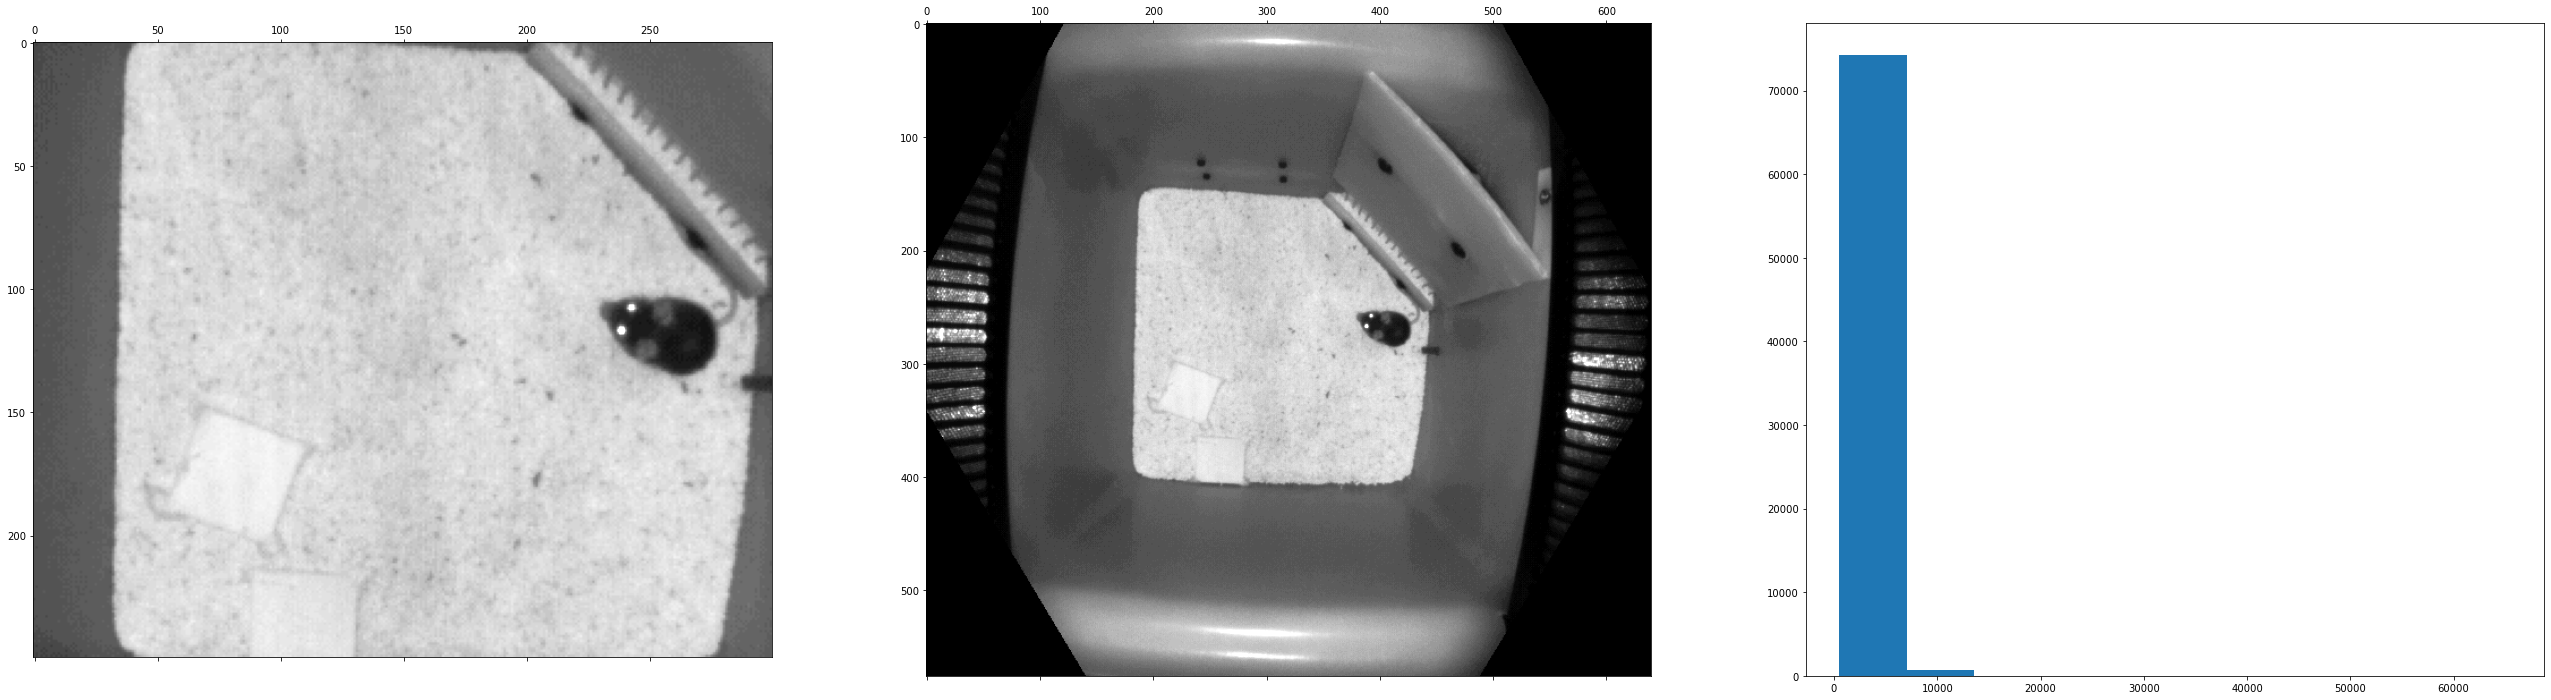

In [33]:
fig, axs = plt.subplots(ncols=3, figsize=(15*3,4*3))
frame = frames[0].astype(np.float32)
axs[1].matshow(frame, cmap='Greys_r', vmin = 0, vmax=8000, interpolation=None)

frame = frames[0][150:400, 150:450]
axs[0].matshow(frame, cmap='Greys_r', vmin = 0, vmax=8000, interpolation=None)
axs[2].hist(frame.flatten())